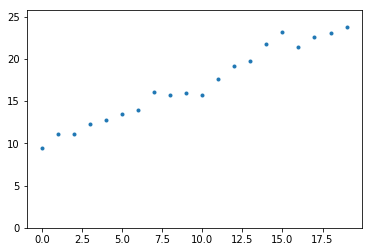

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 构造数据
x = np.arange(20)
X = np.matrix(np.r_[np.ones(20), x].reshape(2, 20))
y = (np.arange(20) + np.random.randn(20)) * 0.75 + 10
theta = np.matrix(np.ones(2))
plt.plot(x, y, '.')
plt.ylim(0, max(y)+2)
plt.show()  

我这里以斜率为0.75，截距10随机产生了20个数字，如上图，然后以步长$\alpha$为0.0001开始训练，训练过程中如果$\alpha$就会出现来回震荡，cost函数越来越大的情况, theta[0],theta[1] 分别对应解决和斜率，为了对比我拟合的准确度，我用了scipy.stats中的linregress函数，貌似我的拟合结果比linregerss拟合好好一些。

In [6]:

# 开始做theta的梯度下降，这里相当于批梯度下降    
for i in range(10000):
    theta = theta - (0.0001*(theta*X - y)*X.T)
    if i % 200 == 0:
        print (theta*X - y)*(theta*X - y).T
print theta
print stats.linregress(x, y)

[[ 686.67128319]]
[[ 339.54992151]]
[[ 276.29829861]]
[[ 225.24099781]]
[[ 184.0270677]]
[[ 150.75879836]]
[[ 123.90434061]]
[[ 102.22717148]]
[[ 84.72915808]]
[[ 70.60459822]]
[[ 59.20312158]]
[[ 49.99974314]]
[[ 42.57069009]]
[[ 36.57388909]]
[[ 31.7332153]]
[[ 27.8257782]]
[[ 24.67165848]]
[[ 22.12562359]]
[[ 20.07044043]]
[[ 18.4114774]]
[[ 17.07234694]]
[[ 15.99138833]]
[[ 15.11882844]]
[[ 14.41448994]]
[[ 13.84594133]]
[[ 13.38700358]]
[[ 13.01654474]]
[[ 12.71750691]]
[[ 12.47612078]]
[[ 12.28127164]]
[[ 12.12398759]]
[[ 11.99702644]]
[[ 11.89454221]]
[[ 11.81181598]]
[[ 11.7450386]]
[[ 11.69113528]]
[[ 11.64762401]]
[[ 11.61250131]]
[[ 11.58414993]]
[[ 11.56126444]]
[[ 11.54279105]]
[[ 11.52787917]]
[[ 11.51584215]]
[[ 11.50612576]]
[[ 11.4982826]]
[[ 11.49195152]]
[[ 11.48684102]]
[[ 11.48271578]]
[[ 11.47938584]]
[[ 11.47669789]]
[[ 9.68518956  0.76938181]]
LinregressResult(slope=0.76621366485557074, intercept=9.7262862308266396, rvalue=0.98563187263060437, pvalue=2.352961371

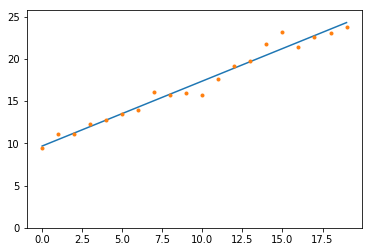

In [7]:
thetaA = theta.getA()
plt.plot(x, x*thetaA[0][1]+thetaA[0][0])
plt.plot(x, y, '.')
plt.ylim(0, max(y)+2)
plt.show()

如上图，点是原始数据，蓝色的线是通过theta绘制出来拟合的线，因为feature只有一维并且是线性拟合，所以并不需要考虑正则化和过拟合。 